### Plots, v0.1 setup notes

In [ ]:
# 2023-10-24
    # PNNL repo checkpoint version, unencoded baseline plots
    # Completed through LogReg, Ridgeline, and UMAP plots
    # For copy number, gene expression, and proteomics feature sets
    # Derived from mapping:
    # Intersection of seven cancer types across cell line and CPTAC
    # Baseline for initial encoding tests of composite loss function

### Code start

In [1]:
%whos

Interactive namespace is empty.


### Imports

In [2]:
import pandas as pd
import numpy as np
import glob

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

from scipy.spatial.distance import euclidean
from matplotlib.colors import ListedColormap
from joypy import joyplot

import umap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/karlberb/miniforge3/envs/py310tf210/lib/python3

### Colors

In [3]:
# Color frame for cancer type on box plots
tcga_colors = pd.read_csv('plot_color_files/tcga_colors.tsv',
                          sep = '\t',
                          # index_col = 0 # Cancer type as column for logreg color mapping
                         )

In [4]:
# Grey-scale frame, model-type box plots
grey_colors = pd.read_csv('plot_color_files/grey_scale.tsv', sep = '\t', index_col = 0)

### Cancer type mappings

In [5]:
# TCGA colors on plots, build versions for alt y-mappings
cancer_type_abbreviation_mapping = {
    'Clear cell renal cell carcinoma': 'KIRCKICH', # combined-in chromophobe
    'Colon adenocarcinoma': 'COADREAD', # combined-in rectal adeno
    'Pancreatic ductal adenocarcinoma': 'PAAD',
    'Breast carcinoma': 'BRCA',
    'Glioblastoma': 'LGGGBM', # combined-in low grade glioma
    'Lung squamous cell carcinoma': 'LUSC',
    'Lung adenocarcinoma': 'LUAD',
    'Endometrial carcinoma': 'UCEC',
    'Head and neck squamous cell carcinoma': 'HNSC',
    'Ovarian carcinoma': 'OV'
}

### Toggles for plot and file naming, data reads

In [ ]:
# File name place holders to match encoded results

In [8]:
latent_dim = 'NaN'

In [9]:
epochs = '0'

In [12]:
# Toggle set zero
mode_ttl = 'model type'
mode = 'model_type' # to logistic regression function

In [ ]:
# Toggle set one

In [26]:
mdls_ttl = 'Cell line + CPTAC' # version 0.1
mdls = 'cptac_+_cell_line'

In [ ]:
mdls_ttl = 'Cell line + CPTAC + HCMI' # later, place-holder
mdls = 'cptac_+_cell_line_+_hcmi'

In [ ]:
# Toggle set two

In [47]:
dta_ttl = 'copy number'
dta_typ = 'cnvr'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_cnvr_996.tsv',
                       sep = '\t', index_col = 0)

In [48]:
len(dta_typ_obj) # check

996

In [10]:
dta_ttl = 'gene expression'
dta_typ = 'gexp'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_gexp_998.tsv',
                       sep = '\t', index_col = 0)
len(dta_typ_obj)

998

In [55]:
dta_ttl = 'proteomics'
dta_typ = 'prot'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_prot_850.tsv',
                       sep = '\t', index_col = 0)
len(dta_typ_obj)

850

In [57]:
dta_typ # check

'prot'

### LogReg function

In [6]:
# Takes dta_typ_obj and label mode as args
def log_reg(dta_typ_obj, mode):
    col_X_strt = 2 # <-- this skips the dual-label columns
    f1_stor_frm = pd.DataFrame()

    # Logistic regression repeat loop, to get error
    for i in list(range(0, 5)):
        print(i)

        # Train test split
        trn = dta_typ_obj.sample(round(len(dta_typ_obj) * .8))
        tst = dta_typ_obj.loc[~dta_typ_obj.index.isin(trn.index)]
    
        X_trn = trn.iloc[:, col_X_strt:]
        X_tst = tst.iloc[:, col_X_strt:]

        # Prediction targets, y is either model system or cancer type
        y_trn = trn[mode]
        y_tst = tst[mode]
        
        clf = LogisticRegression().fit(X_trn, y_trn)
        y_pred = clf.predict(X_tst)
        
        f1_by_class = f1_score(y_tst, y_pred, average=None)
        f1_df = pd.DataFrame({'Label': list(y_tst.unique()),
                              'F1_Score': f1_by_class})
        f1_stor_frm = pd.concat([f1_stor_frm, f1_df], axis = 0)
    return f1_stor_frm

### Model system log reg runs

In [21]:
# CNVR model type run
f1_stor_frm = log_reg(dta_typ_obj, mode) # Mode will be either cancer model system
                                         # or cancer type

0
1
2
3
4


In [22]:
f1_stor_frm # cnvr on model system
            # Observation - logistic regression can perfectly separate
            # unencoded samples by model system for this data type

,Label,F1_Score
0,Tumor,1.0
1,cell line,1.0
0,Tumor,1.0
1,cell line,1.0
0,Tumor,1.0
1,cell line,1.0
0,Tumor,1.0
1,cell line,1.0
0,Tumor,1.0
1,cell line,1.0


In [33]:
# GEXP rerun
f1_stor_frm = log_reg(dta_typ_obj, mode)

0
1
2
3
4


In [34]:
f1_stor_frm # gexp

,Label,F1_Score
0,Tumor,1.0
1,cell line,1.0
0,Tumor,1.0
1,cell line,1.0
0,Tumor,1.0
1,cell line,1.0
0,Tumor,1.0
1,cell line,1.0
0,Tumor,1.0
1,cell line,1.0


In [60]:
# PROT run
f1_stor_frm = log_reg(dta_typ_obj, mode)

0
1
2
3
4


In [63]:
f1_stor_frm # Proteomics log reg scores, unencoded

,Label,F1_Score
0,Tumor,0.984127
1,cell line,0.800000
0,Tumor,0.987261
1,cell line,0.846154
0,Tumor,0.984520
1,cell line,0.705882
0,Tumor,0.984127
1,cell line,0.800000
0,Tumor,0.984026
1,cell line,0.814815


In [13]:
mode # check

'model_type'

In [36]:
dta_typ

'gexp'

#### logreg i/o

In [ ]:
f1_stor_frm.to_csv('results_data/log_reg_f1_'+mode+'_'+dta_typ+'_unencoded_v0.1.tsv',
                       sep = '\t')

### Model-type logreg plot - greyscale

In [ ]:
# Optional read from disk point
f1_stor_frm = pd.read_csv('results_data/log_reg_f1_'+mode+'_'+dta_typ+'_unencoded_v0.1.tsv',
                           sep = '\t', index_col = 0)

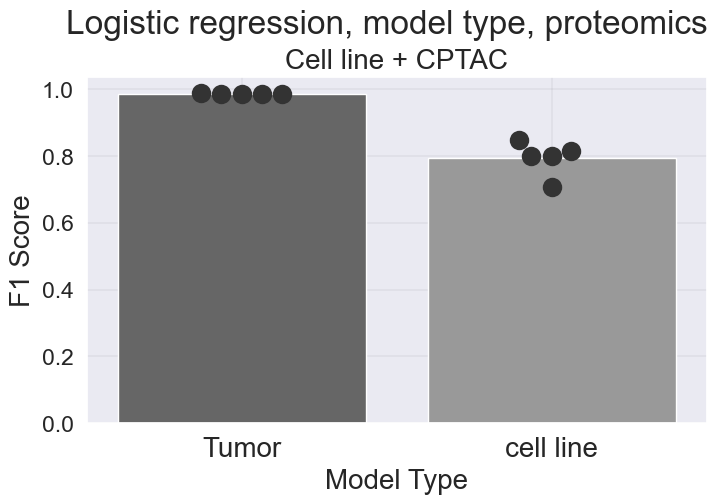

In [64]:
# Log Reg on cancer model system type
    # add latent dim - 
    # and epochs - 
plt.figure(figsize=(8, 4.5))
sns.set_style("whitegrid")
sns.set(font_scale=1.5)

sns.barplot(x='Label', y='F1_Score', data=f1_stor_frm, palette=['#666666', '#999999'],
           errorbar=None)
sns.swarmplot(x='Label', y='F1_Score', data=f1_stor_frm, color='#333333', size=14)

plt.suptitle('Logistic regression, '+mode_ttl+', '+dta_ttl,
             fontsize=24, y = 1.03)
plt.title(mdls_ttl, fontsize=20)
plt.xlabel('Model Type', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('F1 Score', fontsize=20)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.savefig('composite_loss_devel/results/log_reg_'+mode+'_'+dta_typ+'_front_end_plots_v0.png',
            bbox_inches='tight')

### Cancer-type logreg plot - TCGA colors

In [24]:
# Reset from toggle set zero
mode_ttl = 'cancer type'
mode = 'cancer_type'

In [68]:
dta_ttl = 'copy number'
dta_typ = 'cnvr'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_cnvr_996.tsv',
                       sep = '\t', index_col = 0)
len(dta_typ_obj)

In [88]:
dta_ttl = 'gene expression'
dta_typ = 'gexp'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_gexp_998.tsv',
                       sep = '\t', index_col = 0)
len(dta_typ_obj)

In [109]:
dta_ttl = 'proteomics'
dta_typ = 'prot'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_prot_850.tsv',
                       sep = '\t', index_col = 0)
len(dta_typ_obj)

850

In [69]:
# CNVR model type run
# Observation - hitting iteration limit cancer type, will need to increase the number of log reg iterations
f1_stor_frm = log_reg(dta_typ_obj, mode) # Mode is cancer type <-- dual-label toggle

0


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
# GEXP model type run
# Observation - hitting iteration limit
f1_stor_frm = log_reg(dta_typ_obj, mode)

0


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
# PROT model type run
# Observation - hitting iteration limit
f1_stor_frm = log_reg(dta_typ_obj, mode) # Mode is cancer type <--

0


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4


/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
tcga_colors.head(1) # Correct as two-column form here, overwrite for ridgeline later

,tcga_cohorts,cohort_color
0,ACC,#C1A72F


In [111]:
tcga_color_mapping = dict(zip(tcga_colors['tcga_cohorts'], tcga_colors['cohort_color']))

#### Pre-plot inpsections

In [77]:
f1_stor_frm.head(3) # CNVR

,Label,F1_Score
0,Breast carcinoma,0.763636
1,Colon adenocarcinoma,0.935484
2,Lung squamous cell carcinoma,0.735294


In [97]:
f1_stor_frm.head(3) # GEXP

,Label,F1_Score
0,Breast carcinoma,0.966667
1,Colon adenocarcinoma,0.977778
2,Lung squamous cell carcinoma,0.984615


In [105]:
f1_stor_frm.head(3) # PROT

,Label,F1_Score
0,Breast carcinoma,0.979592
1,Colon adenocarcinoma,0.978723
2,Lung squamous cell carcinoma,0.981132


### Cancer-type logistic regression color mapping

In [112]:
unique_labels = f1_stor_frm['Label'].unique() # Y-Mapping extraction
                                              # Keep for future,
                                              # Different y-mappings will lead to different unique label sets

In [99]:
unique_labels

array(['Breast carcinoma', 'Colon adenocarcinoma',
       'Lung squamous cell carcinoma', 'Lung adenocarcinoma',
       'Ovarian carcinoma', 'Pancreatic ductal adenocarcinoma',
       'Clear cell renal cell carcinoma'], dtype=object)

In [113]:
palette_dict = {}
for label in unique_labels:
    tcga_abbreviation = cancer_type_abbreviation_mapping.get(label)
    color = tcga_color_mapping.get(tcga_abbreviation)
    if color:
        palette_dict[label] = color

In [128]:
palette_dict

{'Breast carcinoma': '#ED2891',
 'Colon adenocarcinoma': '#9EDDF9',
 'Lung squamous cell carcinoma': '#A084BD',
 'Lung adenocarcinoma': '#D3C3E0',
 'Ovarian carcinoma': '#D97D25',
 'Pancreatic ductal adenocarcinoma': '#6E7BA2',
 'Clear cell renal cell carcinoma': '#F8AFB3'}

### Logistic regression on cancer type

In [101]:
# Cancer Type Logistic Regression Plot Function, I want these functions in-line to modify with the call
def lgrg_plt_fnc(f1_stor_frm, mdls, data_name, latent_dim, epochs, mode):
    plt.figure(figsize=(8, 4))
    sns.set_style("whitegrid")
    # sns.set(font_scale=2)  # Increase the font scale for larger fonts
    
    ax = sns.barplot(
        x='Label', y='F1_Score', data=f1_stor_frm,
        palette=palette_dict,
        errorbar=None)
    sns.swarmplot(x='Label', y='F1_Score', data=f1_stor_frm,
                  color='#333333', size=8)  # Increase point size
    
    plt.suptitle('Logistic regression, '+mode_ttl+', '+dta_ttl,
             fontsize=24, y = 1.04)  # Increase title font 
    plt.title(mdls_ttl, fontsize=20)
    plt.xlabel('Cancer type', fontsize=20)  # Increase x-axis label font size
    plt.ylabel('F1 Score', fontsize=20)  # Increase y-axis label font size
    
    plt.xticks(rotation=45, ha = 'right', fontsize = 16)  # Rotate x-axis labels for better visibility
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    # Modify the save path to use the provided parameters
    plt.savefig('composite_loss_devel/results/mdl_systms.'+mdls+'_'+dta_typ+'_dim.'+str(
                latent_dim)+'_epochs.'+str(
                epochs)+'_mode.'+mode+'.png', bbox_inches='tight', dpi = 300)
    plt.show()

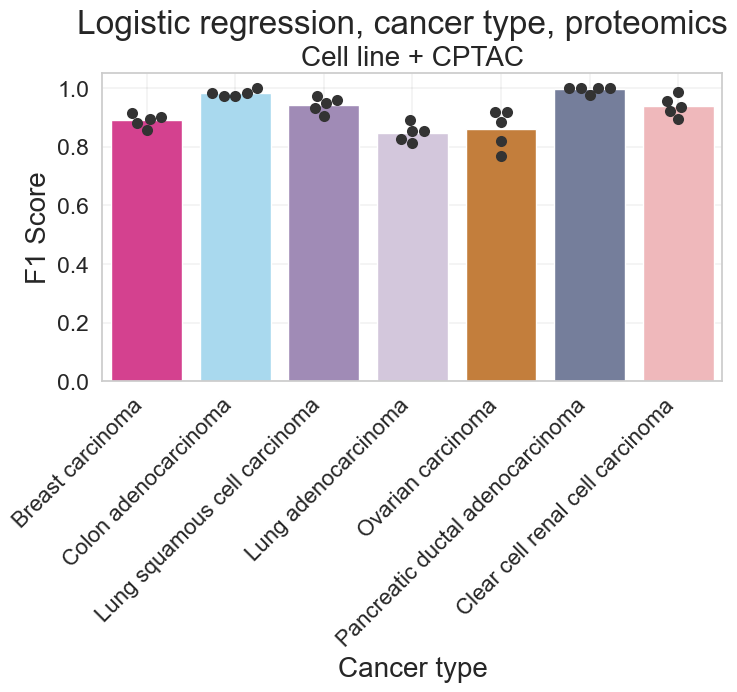

In [114]:
lgrg_plt_fnc(f1_stor_frm, mdls, dta_typ, latent_dim, epochs, mode)

### Euclidean data reads

In [ ]:
# For extraction of values from distance column inserted frame
dist_typ = 'cncr_typ_dstncs'

In [116]:
dta_ttl = 'copy number'
dta_typ = 'cnvr'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_cnvr_996.tsv',
                       sep = '\t', index_col = 0)
dta_typ_obj.shape

(996, 13903)

In [155]:
dta_ttl = 'gene expression'
dta_typ = 'gexp'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_gexp_998.tsv',
                       sep = '\t', index_col = 0)
dta_typ_obj.shape

(998, 28118)

In [180]:
dta_ttl = 'proteomics'
dta_typ = 'prot'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_prot_850.tsv',
                       sep = '\t', index_col = 0)
dta_typ_obj.shape

(850, 3411)

### Euclidean distance quantifications

In [9]:
# Euclicean distance, model type
def mdl_typ_dist(sample, features, df):
    other_types = df[df['model_type'] != sample['model_type']]
    mean_features_other_types = other_types[features].mean()
    distance = euclidean(sample[features], mean_features_other_types)
    return distance

In [8]:
# Euclidean distance, cancer type
def cncr_typ_dist(sample, features, df):
    other_types = df[df['cancer_type'] != sample['cancer_type']]
    mean_features_other_types = other_types[features].mean()
    distance = euclidean(sample[features], mean_features_other_types)
    return distance

In [181]:
# Run once, column inserted for each ridgeline distance measurement

# Unencoded feature columns
feature_columns = dta_typ_obj.columns[2:]

# Calculate the Euclidean distances for each sample, inserting into new columns
dta_typ_obj['mdl_typ_dstncs'] = dta_typ_obj.apply(
    lambda row: mdl_typ_dist(row, feature_columns, dta_typ_obj), axis=1)

dta_typ_obj['cncr_typ_dstncs'] = dta_typ_obj.apply(
    lambda row: cncr_typ_dist(row, feature_columns, dta_typ_obj), axis=1)

# Sort the columns for pre-plot inspection
new_cols = ['cancer_type', 'model_type', 'cncr_typ_dstncs', 'mdl_typ_dstncs'] + list(feature_columns)
dta_typ_obj = dta_typ_obj[new_cols]

In [182]:
dta_typ_obj.head(1) # Distance column inserted frame

,cancer_type,model_type,cncr_typ_dstncs,mdl_typ_dstncs,2.0,14.0,16.0,22.0,23.0,30.0,...,100131187.0,100131863.0,100187828.0,100240709.0,100526737.0,100529067.0,106479938.0,106480180.0,106480993.0,107075310.0
improve_sample_id,,,,,,,,,,,,,,,,,,,,,
108162.0,Breast carcinoma,Tumor,29.579152,28.573247,0.712229,-0.21057,-0.021351,0.03911,0.104875,0.139418,...,-0.035206,-0.167969,2.210383,0.362428,-0.056397,0.598394,0.376233,0.154333,0.118613,-0.634982


#### Recycled variable check, from colored bar plots, set 2

In [27]:
print(mdls_ttl)
print(mdls)

Cell line + CPTAC
cptac_+_cell_line


In [183]:
mode # set in previous cancer-type color bar section
     # recyling variable for sequential run through
     # to build upper and lower 5-panel sections
     # of planned 11-panel losscurve storyline plot

'cancer_type'

#### Figure panel schematic

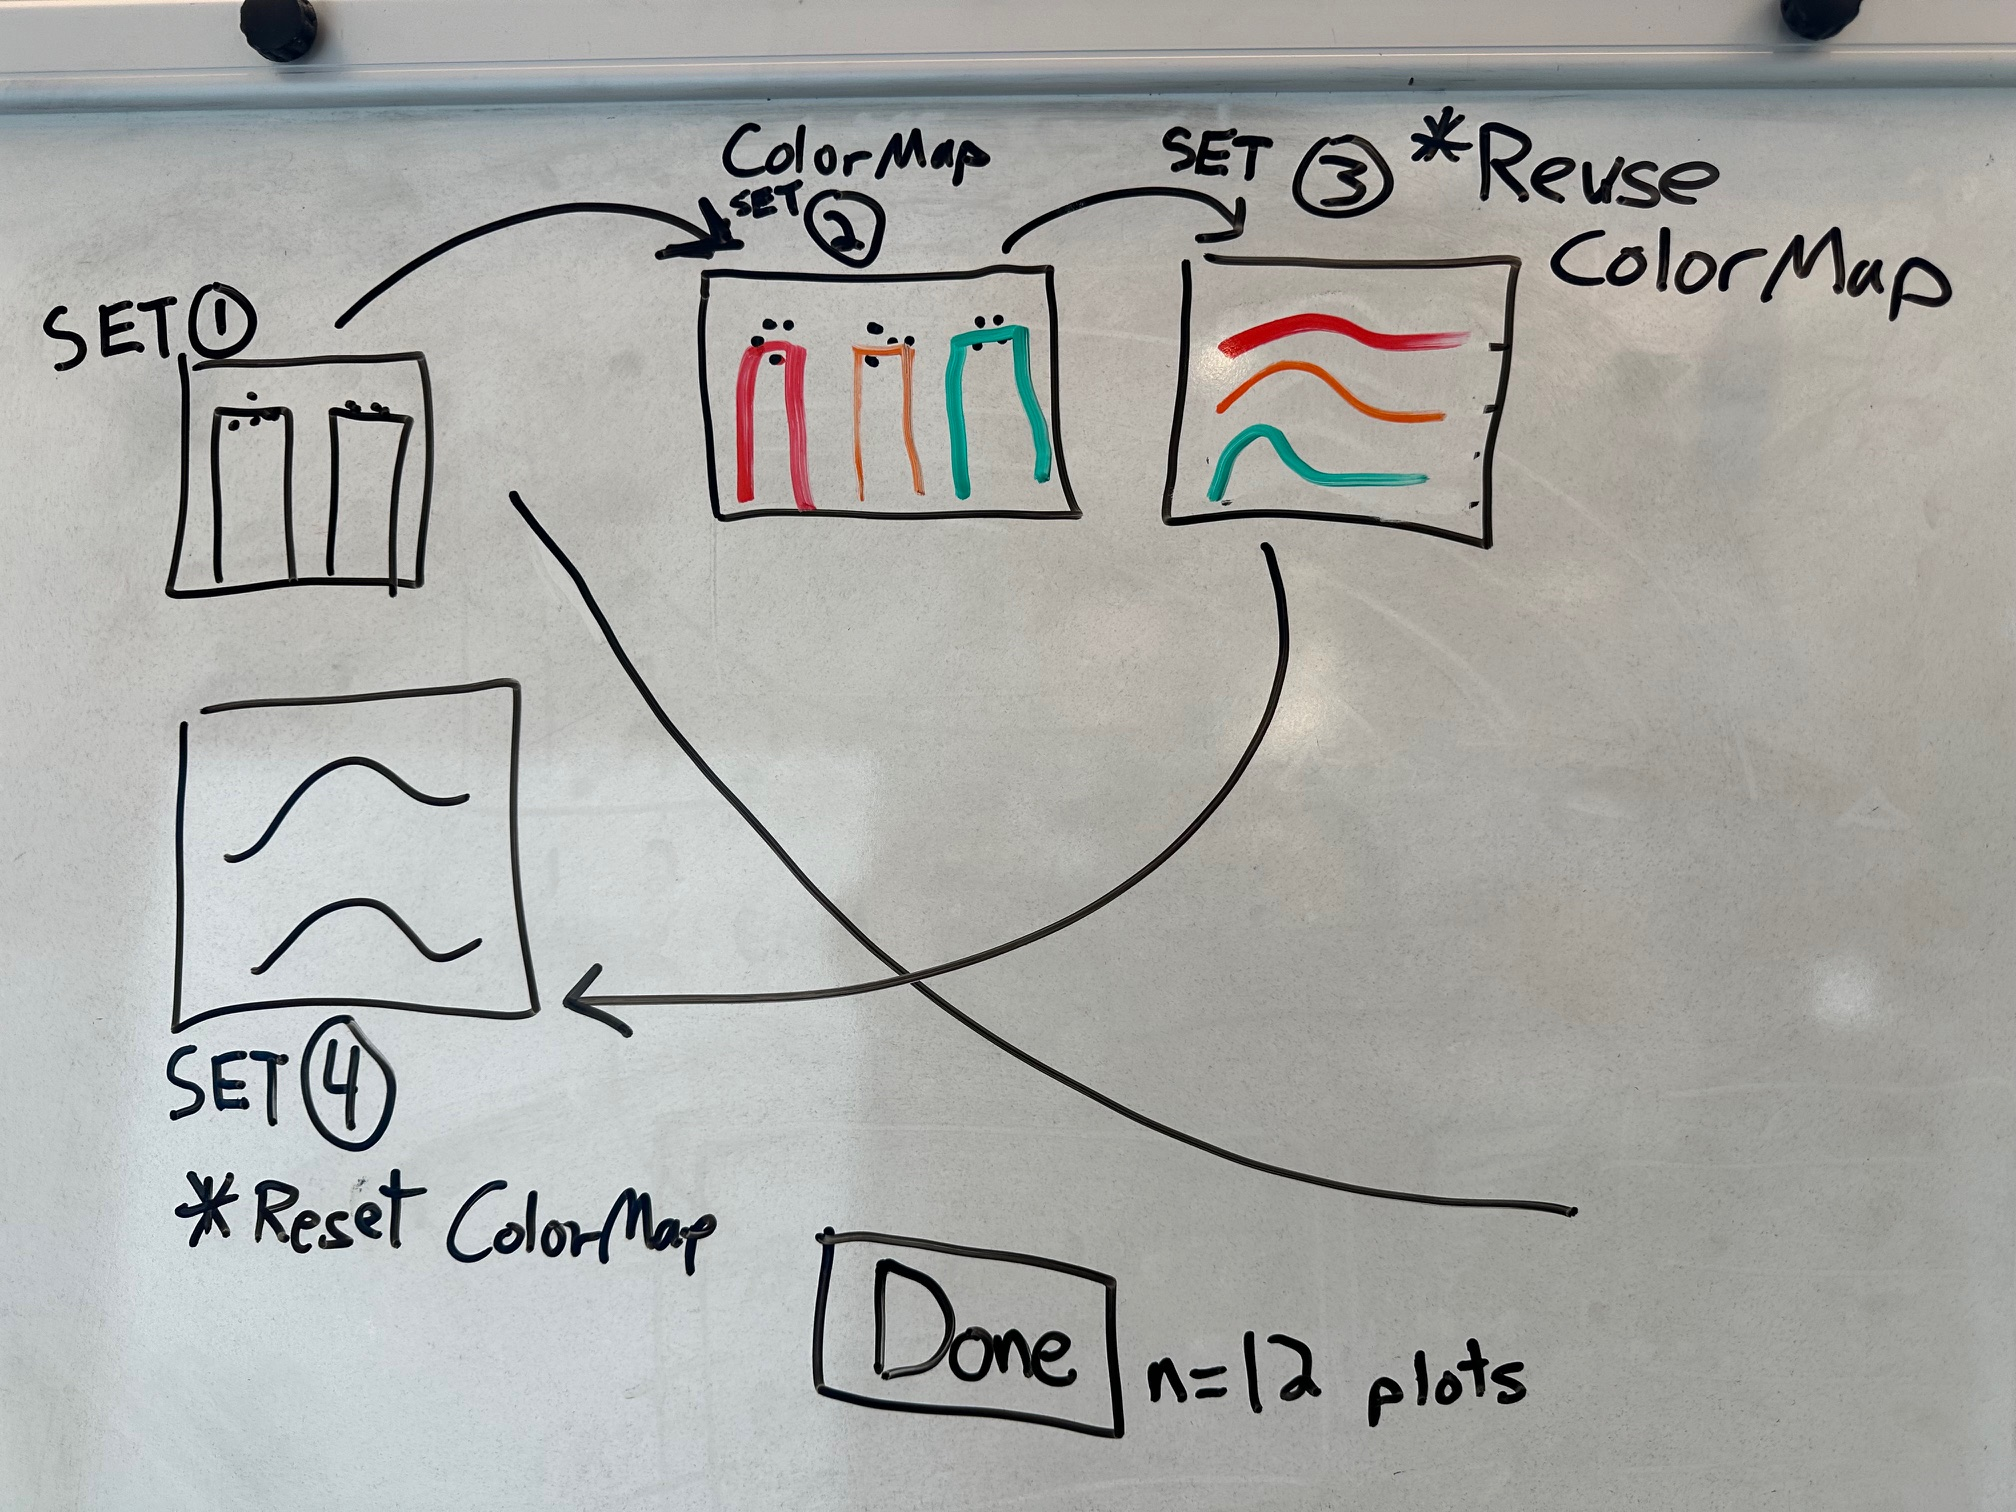

In [22]:
from IPython.display import Image
Image(filename='whiteboard_photos/clockwise_panel_build.jpg', width=600, height=400)

### Euclidean on cancer-type, TCGA colors

In [186]:
average_distances = dta_typ_obj.groupby(
    mode)[dist_typ].mean().sort_values(ascending=False)

In [187]:
average_distances

cancer_type
Clear cell renal cell carcinoma     28.255614
Breast carcinoma                    27.316253
Ovarian carcinoma                   26.134894
Lung adenocarcinoma                 25.116881
Lung squamous cell carcinoma        24.286912
Colon adenocarcinoma                23.607652
Pancreatic ductal adenocarcinoma    22.776825
Name: cncr_typ_dstncs, dtype: float64

In [188]:
# Color plot, Sorted DF build
sorted_df = dta_typ_obj.loc[dta_typ_obj[mode].isin(average_distances.index)]
sorted_df[mode] = pd.Categorical(
    sorted_df[mode], categories=average_distances.index, ordered=True)
sorted_df = sorted_df.sort_values(mode)

In [189]:
tcga_colors = pd.read_csv('plot_color_files/tcga_colors.tsv', sep = '\t', index_col = 0) # OVERWRITE FOR INDEXING
custom_color_list = [tcga_colors.loc[cancer_type_abbreviation_mapping[cancer_type],'cohort_color'] for cancer_type in average_distances.index]
custom_colormap = ListedColormap(custom_color_list)

In [190]:
custom_color_list # Extract from log reg color dict (next actions), Version one

['#F8AFB3', '#ED2891', '#D97D25', '#D3C3E0', '#A084BD', '#9EDDF9', '#6E7BA2']

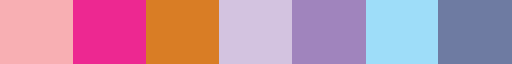

In [191]:
custom_colormap # Prot, check for order switching

In [192]:
type(custom_colormap)

matplotlib.colors.ListedColormap

In [193]:
# For sample count labels
y_values = np.linspace(0.75, 0.068, 7) # Affected by figure size

### Distance by cancer-type

<Figure size 640x480 with 0 Axes>

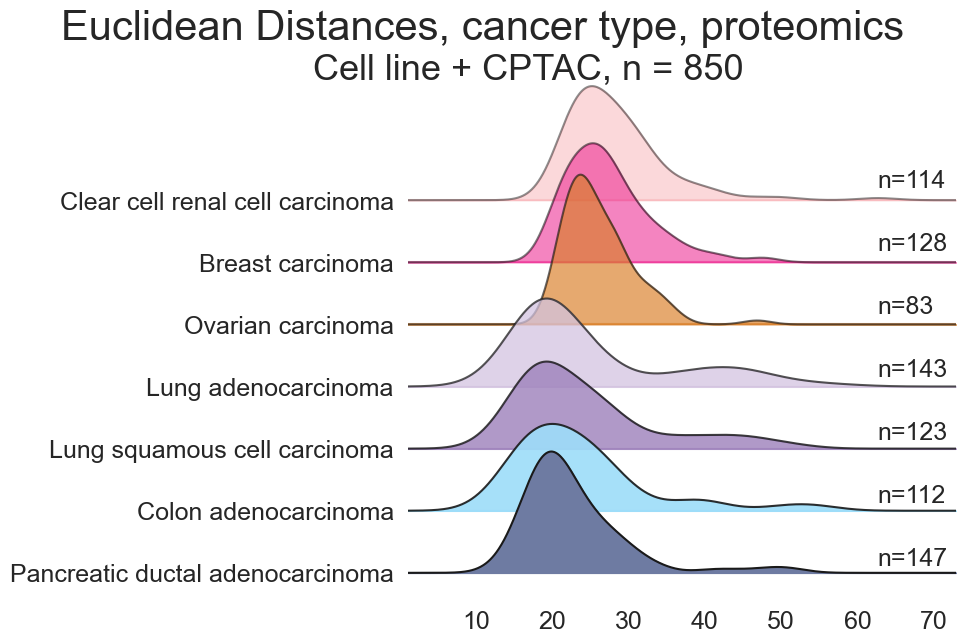

In [194]:
# Color plot, Cancer Type
plt.figure()
joyplot(
    data=sorted_df[[mode, dist_typ]], 
    by=mode,
    figsize=(10, 6.5), # affects y-values
    colormap=custom_colormap,
    fade=True
    )

for y_value, cancer_type in zip(y_values, sorted_df[mode].unique()):
    count = dict(sorted_df[mode].value_counts())[cancer_type]
    x_position = sorted_df[dist_typ].max()
    plt.annotate(f"n={count}", xy=(x_position, y_value), verticalalignment='center')

plt.suptitle('Euclidean Distances, '+mode_ttl+', '+dta_ttl,
             fontsize=30, y = 1.01)
plt.title(mdls_ttl+
          ', n = '+str(dta_typ_obj.shape[0]),
          y = .92,
          x = .22,
          fontsize = 26
         )
plt.savefig('composite_loss_devel/results/rdgln_'+mode+'_'+mdls+'_'+dta_typ+'.png', bbox_inches = 'tight',
           dpi = 300)

In [ ]:
# Why is this bimodal? # Check on new version cell line data
# Remove the lamda; combine into single function

### Euclidean on model-type, greyscale

In [204]:
# Start grey ridgeline plot, plot four continuing clockwise
mode_ttl = 'model type'
mode = 'model_type'
dist_typ = 'mdl_typ_dstncs'

In [209]:
abbreviation_mapping = {
    'cell line': 'cell line',
    'Tumor': 'Tumor',
    'HCMI': 'HCMI', # To be tested
}

In [205]:
dta_ttl = 'copy number'
dta_typ = 'cnvr'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_cnvr_996.tsv',
                       sep = '\t', index_col = 0)
dta_typ_obj.shape

(996, 13903)

In [213]:
dta_ttl = 'gene expression'
dta_typ = 'gexp'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_gexp_998.tsv',
                       sep = '\t', index_col = 0)
dta_typ_obj.shape

(998, 28118)

In [219]:
dta_ttl = 'proteomics'
dta_typ = 'prot'
dta_typ_obj = pd.read_csv('composite_loss_devel/data/cl_cp_prot_850.tsv',
                       sep = '\t', index_col = 0)
dta_typ_obj.shape

(850, 3411)

In [196]:
grey_colors.head(1)

,quant_mode_color
cell line,#999999


In [220]:
# Run once for each data type object, this injects a column for each ridgeline

# Encoded feature columns
feature_columns = dta_typ_obj.columns[2:]

# Calculate the Euclidean distance for each sample, inject into new column
dta_typ_obj['mdl_typ_dstncs'] = dta_typ_obj.apply(
    lambda row: mdl_typ_dist(row, feature_columns, dta_typ_obj), axis=1)

dta_typ_obj['cncr_typ_dstncs'] = dta_typ_obj.apply(                      # <--- Color map from cancer type LogReg bar plot
    lambda row: cncr_typ_dist(row, feature_columns, dta_typ_obj), axis=1)

# Sort the columns
new_cols = ['cancer_type', 'model_type', 'cncr_typ_dstncs', 'mdl_typ_dstncs'] + list(feature_columns)
dta_typ_obj = dta_typ_obj[new_cols]

In [221]:
average_distances = dta_typ_obj.groupby(
    mode)[dist_typ].mean().sort_values(ascending=False)
sorted_df = dta_typ_obj.loc[dta_typ_obj[mode].isin(average_distances.index)]
sorted_df[mode] = pd.Categorical(
    sorted_df[mode], categories=average_distances.index, ordered=True)
sorted_df = sorted_df.sort_values(mode)

In [222]:
custom_color_list = [grey_colors.loc[abbreviation_mapping[model_type],'quant_mode_color'] for model_type in average_distances.index]
custom_colormap = ListedColormap(custom_color_list)

In [223]:
y_values = np.linspace(0.52, 0.15, 2)

### Distance by model-type

<Figure size 640x480 with 0 Axes>

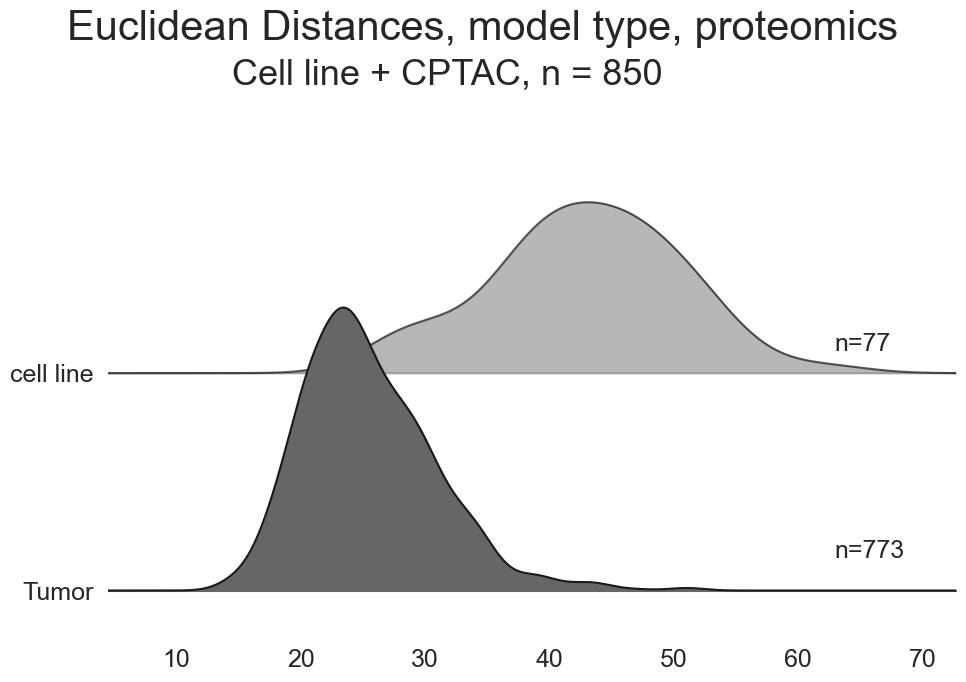

In [224]:
# Grey scale plot, Model type
plt.figure()
joyplot(
    data=sorted_df[[mode, dist_typ]], 
    by=mode,
    figsize=(10, 6.5),
    colormap=custom_colormap,
    fade=True
    )

for y_value, cancer_type in zip(y_values, sorted_df[mode].unique()):
    count = dict(sorted_df[mode].value_counts())[cancer_type]
    x_position = sorted_df[dist_typ].max()
    plt.annotate(f"n={count}", xy=(x_position, y_value), verticalalignment='center')

plt.suptitle('Euclidean Distances, '+mode_ttl+', '+dta_ttl,
             fontsize=30, y = 1.06)
plt.title(mdls_ttl+
          ', n = '+str(dta_typ_obj.shape[0]),
          y = .97,
          x = .4,
          fontsize = 26
         )
plt.savefig('composite_loss_devel/results/rdgln_'+mode+'_'+mdls+'_'+dta_typ+'.png', bbox_inches = 'tight',
           dpi = 300)

### UMAP

In [28]:
reducer = umap.UMAP(n_components=2)

In [29]:
%whos

Variable                           Type         Data/Info
---------------------------------------------------------
Image                              type         <class 'IPython.core.display.Image'>
ListedColormap                     type         <class 'matplotlib.colors.ListedColormap'>
LogisticRegression                 type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
StandardScaler                     type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
cancer_type_abbreviation_mapping   dict         n=10
classification_report              function     <function classification_report at 0x148b1ce50>
dta_ttl                            str          gene expression
dta_typ                            str          gexp
dta_typ_obj                        DataFrame                             <...>998 rows x 28118 columns]
epochs                             str          0
euclidean                          function     <function euclidean at 0x1390d70

In [37]:
mdls_ttl # Plot labeling

'Cell line + CPTAC'

In [49]:
# This UMAP is cancer type / model type (mode) integrated
# Next action: switch x marker to triangle - done

In [82]:
mdls

'cptac_+_cell_line'

In [30]:
latent_dim

'NaN'

In [31]:
epochs

'0'

In [80]:
dta_ttl = 'copy number'
dta_typ = 'cnvr'
dta_typ_obj = pd.read_csv('data/cl_cp_cnvr_996.tsv',
                       sep = '\t', index_col = 0)
dta_typ_obj.shape

(996, 13903)

In [88]:
dta_ttl = 'gene expression'
dta_typ = 'gexp'
dta_typ_obj = pd.read_csv('data/cl_cp_gexp_998.tsv',
                       sep = '\t', index_col = 0)
dta_typ_obj.shape

(998, 28118)

In [91]:
dta_ttl = 'proteomics'
dta_typ = 'prot'
dta_typ_obj = pd.read_csv('data/cl_cp_prot_850.tsv',
                       sep = '\t', index_col = 0)
dta_typ_obj.shape

(850, 3411)

In [92]:
numeric_cols = dta_typ_obj.select_dtypes(include=['number']).columns # Will break if reverting to dta_typ appended column headers
scaled_data = StandardScaler().fit_transform(dta_typ_obj.loc[:, numeric_cols])
embedding = reducer.fit_transform(scaled_data)
emb_df = pd.DataFrame(embedding, index = dta_typ_obj.index)
emb_lbld = pd.concat([emb_df, dta_typ_obj[['cancer_type', 'model_type']]], axis = 1)
emb_lbld.columns = ['UMAP_1', 'UMAP_2', 'cancer_type', 'model_type']

#### Optional disk i_o

In [ ]:
emb_lbld.to_csv('results/umap_'mdls+'_input_to_scatter_'+d_typ+'.tsv', sep = '\t')

In [52]:
emb_lbld_format = emb_lbld.sample(35)

In [53]:
emb_lbld_format.to_csv('prompt_files/emb_lbld_format.tsv', sep = '\t')

#### Color mapping to plot

In [50]:
tcga_colors = pd.read_csv('plot_color_files/tcga_colors.tsv', sep = '\t', index_col = 0) # OVERWRITE FOR INDEXING
unique_cancer_types = emb_lbld['cancer_type'].unique()
custom_palette = {cancer_type: tcga_colors.loc[cancer_type_abbreviation_mapping.get(cancer_type, 'Unknown'), 'cohort_color'] for cancer_type in unique_cancer_types}

In [48]:
emb_lbld

,UMAP_1,UMAP_2,cancer_type,model_type
improve_sample_id,,,,
108162.0,16.874315,-2.634957,Breast carcinoma,Tumor
108163.0,17.571476,-3.895965,Breast carcinoma,Tumor
108164.0,15.493632,-2.728897,Breast carcinoma,Tumor
108165.0,16.289536,-4.544543,Breast carcinoma,Tumor
108166.0,15.958269,-2.966935,Breast carcinoma,Tumor
...,...,...,...,...
1599.0,-5.177965,1.575858,Clear cell renal cell carcinoma,cell line
1600.0,-4.894316,0.256383,Clear cell renal cell carcinoma,cell line
1601.0,-4.845356,0.219139,Clear cell renal cell carcinoma,cell line


### UMAP function

In [85]:
def umap_plot_to_disk(emb_lbld, mdls_ttl, dta_ttl, dta_typ, mdls):
    tcga_colors = pd.read_csv('plot_color_files/tcga_colors.tsv', sep = '\t', index_col = 0) # OVERWRITE FOR INDEXING
    unique_cancer_types = emb_lbld['cancer_type'].unique()
    custom_palette = {cancer_type: tcga_colors.loc[cancer_type_abbreviation_mapping.get(cancer_type, 'Unknown'), 'cohort_color'] for cancer_type in unique_cancer_types}
    emb_lbld.columns = ['UMAP_1', 'UMAP_2', 'Cancer type', 'Model type']
    plt.figure(figsize=(5, 5))
    marker_dict = {'Tumor': '^', 'cell line': 'o'}
    sns.scatterplot(data=emb_lbld, x='UMAP_1', y='UMAP_2',
                    hue='Cancer type', style='Model type', markers=marker_dict,
                    palette=custom_palette, legend='full',
                    s = 200)
    plt.xlabel('UMAP_2', fontsize=16)
    plt.ylabel('UMAP_2', fontsize=16)
    plt.legend(title='Cancer Type', loc='upper left', bbox_to_anchor=(1, 1))
    plt.suptitle(mdls_ttl +', '+ dta_ttl, y = 1.002, fontsize = 20)
    plt.title('n = '+str(len(emb_lbld)), fontsize = 18)
    legend = plt.legend(title='Sample attributes', title_fontsize='14', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    headers_to_bold = ['Cancer type', 'Model type']
    for text in legend.texts:
        if text.get_text() in headers_to_bold:
            text.set_weight('bold')
    plt.savefig('results/umap_function_'+dta_typ+'_'+mdls+'.png', bbox_inches = 'tight', dpi = 300)
    return 'UMAP written to disk'

'UMAP written to disk'

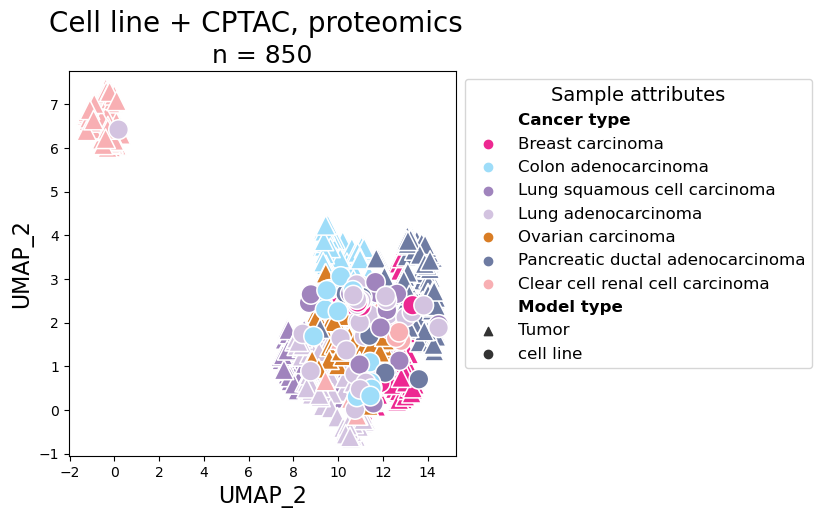

In [93]:
umap_plot_to_disk(emb_lbld, mdls_ttl, dta_ttl, dta_typ, mdls)

### UMAP, notebook in-line devel

In [ ]:
emb_lbld.columns = ['UMAP_1', 'UMAP_2', 'Cancer type', 'Model type']
plt.figure(figsize=(5, 5))
marker_dict = {'Tumor': '^', 'cell line': 'o'}
sns.scatterplot(data=emb_lbld, x='UMAP_1', y='UMAP_2',
                hue='Cancer type', style='Model type', markers=marker_dict,
                palette=custom_palette, legend='full',
                s = 200)
plt.xlabel('UMAP_2', fontsize=16)
plt.ylabel('UMAP_2', fontsize=16)
plt.legend(title='Cancer Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.suptitle(mdls_ttl +', '+ dta_ttl, y = 1.002, fontsize = 20)
plt.title('n = '+str(len(emb_lbld)), fontsize = 18)
legend = plt.legend(title='Sample attributes', title_fontsize='14', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
headers_to_bold = ['Cancer type', 'Model type']
for text in legend.texts:
    if text.get_text() in headers_to_bold:
        text.set_weight('bold')
plt.savefig('results/umap_'+dta_typ+'_'+mdls+'.png', bbox_inches = 'tight', dpi = 300)